<a href="https://colab.research.google.com/github/herika07/project_dibimbing.id/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rincian Tugas:

1. Carilah sebuah dataset (dari kaggle ataupun website lainnya)
2. Lakukan Exploratory Data Analysis pada dataset tersebut.
*   EDA yang dilakukan WAJIB melakukan Handling Missing Value dan Duplicate
*   Proses EDA yang lain bersifat opsional (e.g. handling outlier, encoding)
3. Buat portfolio dalam bentuk Power Point
4. Upload di LinkedIn dan tag **dibimbing.id**

In [39]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 2. Load dataset
df = pd.read_csv('/content/datasett - datasett.csv')  # path di Colab (upload file ke /content)

In [3]:
# Initial exploration
print("="*50)
print("INITIAL DATA EXPLORATION")
print("="*50)
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe(include='all'))

INITIAL DATA EXPLORATION
Dataset shape: (8876, 12)

First 5 rows:
                       created_at        id_str  \
0  Wed Aug 30 23:55:35 +0000 2023  1.700000e+20   
1  Wed Aug 30 23:53:46 +0000 2023  1.700000e+20   
2  Wed Aug 30 23:53:06 +0000 2023  1.700000e+20   
3  Wed Aug 30 23:52:34 +0000 2023  1.700000e+20   
4  Wed Aug 30 23:52:29 +0000 2023  1.700000e+20   

                                           full_text  quote_count  \
0   @gibran_tweet Gak bisa dianeksasi atau diinvasi?          0.0   
1  @gibran_tweet tulisan kota solo itu yang bener...          0.0   
2  @gibran_tweet masing-masing dan bisa menjalank...          0.0   
3  @gibran_tweet Nggih leres Bapak. Setiap permas...          0.0   
4  @FennyAngela6 @gibran_tweet @KemenBUMN @BANKBR...          0.0   

   reply_count  retweet_count  favorite_count lang   user_id_str  \
0          0.0            0.0             0.0   in  6.007472e+07   
1          0.0            0.0             0.0   in  2.446570e+09   
2       

In [42]:
# 3. Tampilkan info awal
print("=== SHAPE DATA ===") # Shape Data: jumlah baris dan kolom data setelah load. Ini menunjukkan ukuran dataset mentah.
print(df.shape)
print("\n=== 5 SAMPLE DATA TERATAS ===") # Sample Data: menampilkan 5 baris pertama untuk melihat seperti apa data kamu (apakah ada typo, format aneh, dll).
print(df.head())
print("\n=== INFO DATA ===") # Info Data: memberi tahu tipe data setiap kolom (numerik, kategorik, datetime, dll.) dan jumlah non-null pada setiap kolom.
print(df.info())

=== SHAPE DATA ===
(8876, 12)

=== 5 SAMPLE DATA TERATAS ===
                       created_at        id_str  \
0  Wed Aug 30 23:55:35 +0000 2023  1.700000e+20   
1  Wed Aug 30 23:53:46 +0000 2023  1.700000e+20   
2  Wed Aug 30 23:53:06 +0000 2023  1.700000e+20   
3  Wed Aug 30 23:52:34 +0000 2023  1.700000e+20   
4  Wed Aug 30 23:52:29 +0000 2023  1.700000e+20   

                                           full_text  quote_count  \
0   @gibran_tweet Gak bisa dianeksasi atau diinvasi?          0.0   
1  @gibran_tweet tulisan kota solo itu yang bener...          0.0   
2  @gibran_tweet masing-masing dan bisa menjalank...          0.0   
3  @gibran_tweet Nggih leres Bapak. Setiap permas...          0.0   
4  @FennyAngela6 @gibran_tweet @KemenBUMN @BANKBR...          0.0   

   reply_count  retweet_count  favorite_count lang   user_id_str  \
0          0.0            0.0             0.0   in  6.007472e+07   
1          0.0            0.0             0.0   in  2.446570e+09   
2          0.

In [58]:
# 4. Cek missing value
print("\n=== JUMLAH MISSING VALUE SETIAP KOLOM ===")
df.isna().sum()


=== JUMLAH MISSING VALUE SETIAP KOLOM ===


,0
created_at,0
id_str,0
full_text,0
quote_count,0
reply_count,0
retweet_count,0
favorite_count,0
lang,0
user_id_str,0
conversation_id_str,0


# Handling Missing Value:

*   Jika jumlah missing pada kolom <5% dari jumlah baris → drop baris `dropna(subset=[col])`
* Jika missing lebih banyak, diisi:

    *   Kolom kategorik: modus.
    *   Kolom numerik: median.

In [44]:
# 5. Handling missing value
# Pilih strategi: drop baris dengan missing atau impute (tergantung konteks datanya)
# Contoh: jika <5% missing, kita drop, jika lebih besar, kita imputasi

threshold = 0.05 * len(df)  # 5% dari jumlah baris
for col in df.columns:
    n_missing = df[col].isnull().sum()
    if n_missing > 0:
        if n_missing <= threshold:
            print(f"Dropping rows dengan missing di kolom '{col}' (missing {n_missing} data <5%)")
            df = df.dropna(subset=[col])
        else:
            if df[col].dtype == 'O':
                print(f"Filling missing di kolom '{col}' dengan modus")
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                print(f"Filling missing di kolom '{col}' dengan median")
                df[col].fillna(df[col].median(), inplace=True)

print("\n=== CEK ULANG MISSING VALUE SETELAH HANDLING ===")
print(df.isnull().sum().sum())

Dropping rows dengan missing di kolom 'quote_count' (missing 1 data <5%)
Dropping rows dengan missing di kolom 'user_id_str' (missing 20 data <5%)

=== CEK ULANG MISSING VALUE SETELAH HANDLING ===
0


In [60]:
# 6. Cek data duplikat
n_duplicates = df.duplicated().sum()
print(f"\n=== JUMLAH DATA DUPLIKAT: {n_duplicates} ===")


=== JUMLAH DATA DUPLIKAT: 0 ===


# Handling Duplicate:

*   Deteksi dengan `df.duplicated()`, lalu `drop_duplicates()` jika ada.

In [61]:
# Handling duplicates
if n_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Data setelah drop duplicates: {df.shape}")

# Deskripsi Statistik:


*   Numerik: mean, median, std, min, max, quartile.
*   Kategorik: count, unique, top (modus), freq (jumlah modus).



In [47]:
# 7. Opsional: deskripsi statistik
print("\n=== DESKRIPSI DATA ===")
print(df.describe(include='all'))


=== DESKRIPSI DATA ===
                            created_at        id_str  \
count                             8855  8.855000e+03   
unique                            8506           NaN   
top     Fri Jul 21 23:00:01 +0000 2023           NaN   
freq                                 6           NaN   
mean                               NaN  1.718727e+20   
std                                NaN  2.398930e+18   
min                                NaN  1.680000e+20   
25%                                NaN  1.700000e+20   
50%                                NaN  1.720000e+20   
75%                                NaN  1.740000e+20   
max                                NaN  1.750000e+20   

                                                full_text  quote_count  \
count                                                8855  8855.000000   
unique                                               8842          NaN   
top     David_Wijaya03 SantorinisSun Jelli_cent Wagima...          NaN   
freq   

# Visualisasi Distribusi
Script menampilkan histogram semua kolom numerik:
*   Membantu kamu melihat distribusi: normal, skewed, outlier, dll.
*   Outlier bisa diidentifikasi dari bar chart yang memiliki nilai jauh di kanan/kiri.

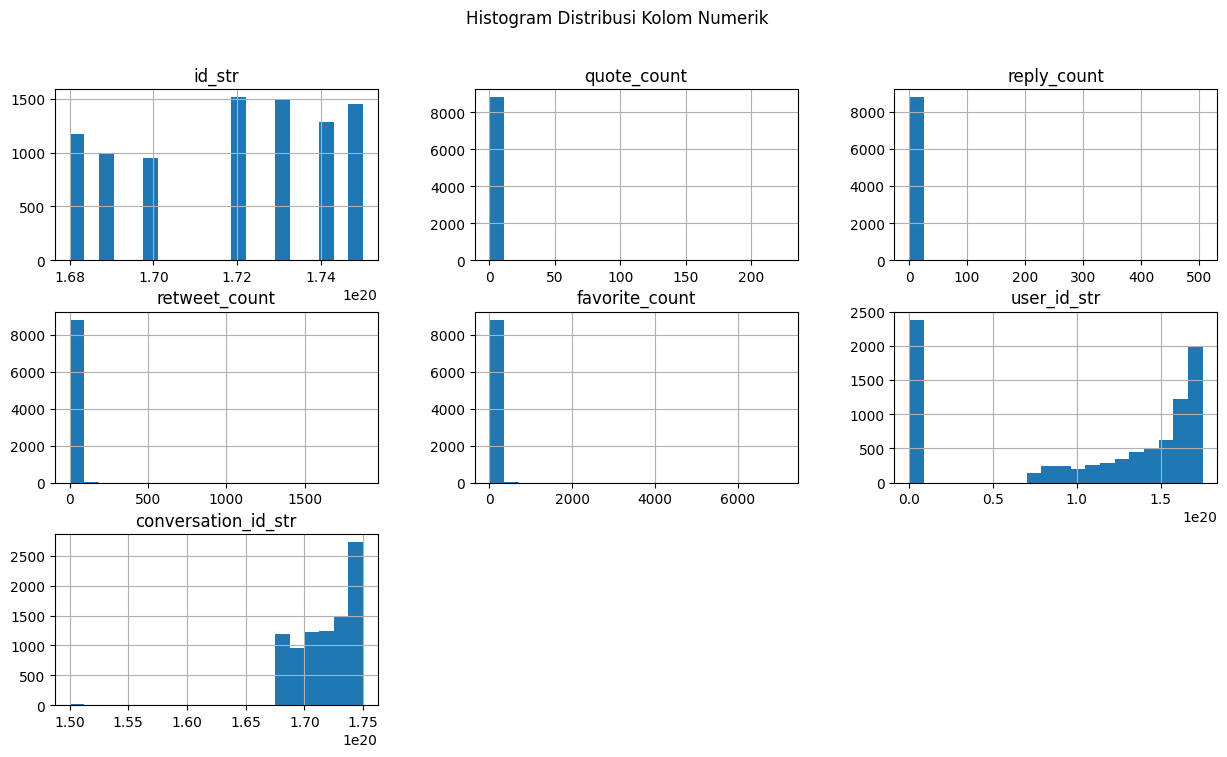

In [48]:
# 8. Opsional: visualisasi distribusi kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns
if len(numerical_cols) > 0:
    df[numerical_cols].hist(figsize=(15, 8), bins=20)
    plt.suptitle("Histogram Distribusi Kolom Numerik")
    plt.show()

# Korelasi Numerik
Jika ada lebih dari 1 kolom numerik, script membuat heatmap korelasi:
*   Nilai mendekati 1 → korelasi positif kuat.
*   Nilai mendekati -1 → korelasi negatif kuat.
* Nilai mendekati 0 → hampir tidak ada korelasi.



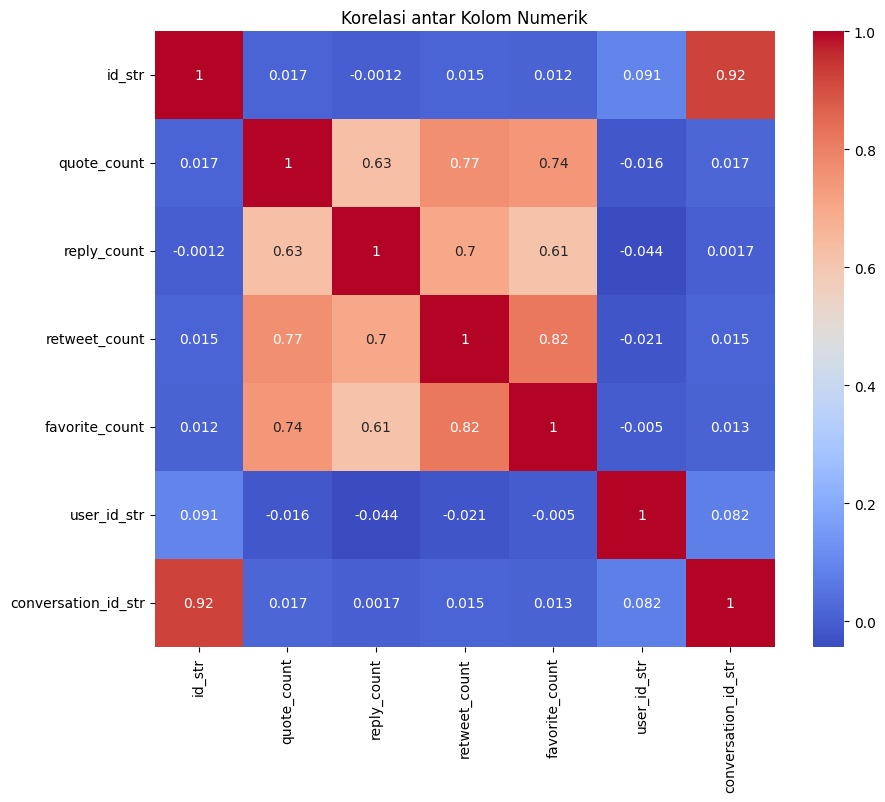

In [49]:
# 9. Opsional: heatmap korelasi numerik
if len(numerical_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Korelasi antar Kolom Numerik")
    plt.show()

# Kesimpulan EDA


1.   Dataset bersih dari missing value setelah handling.
2.   Dataset bebas dari duplicate setelah dihapus.
3. Distribusi & korelasi membantu memahami pola & relasi awal di data.